***
## **Introduction**
***

In today's workshop, we will be learning about the process of `Exploratory Data Analysis`, or more commonly refered to as **EDA**. EDA can be defined as, 

> An approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

Hence, our focus today will be learning how to leverage on existing python packages such as `Matplotlib` and `Seaborn` to achieve this very objective. We will be using a dataset that contains information with regards to NBA players, such as their height, weight, age and pay scale. 

***
## **Getting started**
***

Before we get started with the actual code-along, we have to first install and subsequently load the relevant packages required to generate the relevant plots. 

To install the relevant packages, run the following the cell:

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install missingno
# !pip install SciencePlots

Once we have installed the necessary packages, let's load the required packages. Generally, for an `EDA` process, we would require the following packages:

* `pandas`: To conduct data manipulation and relevant transformation
* `matplotlib`: To plot relevant data visualisations, considered to be a lower-level package
* `seaborn`: To plot relevant data visualisations, built on top of `matplotlib`. 
* `missingno`: Allows to visually observed missing data points with the dataset.

In [50]:
# import the necessary modules
# data manipulation package
import pandas as pd

# visualisation packages
import matplotlib.pyplot as plt
import missingno as ms
import seaborn as sns

# plt.style.use(['science'])
# plt.rcParams.update({
#     "text.usetex": False,
#     "font.family": "serif",   # specify font family here
#     "font.serif": ["Palatino"],  # specify font here
#     "font.size":12})

***
## **Loading dataset**
***

In [31]:
# using pandas to load dataset
df = pd.read_csv("data/nba.csv")

# checking the first 5 rows of data
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


> Question: What are some of the features (*columns*) that you realised are present within the `dataframe`?:

> Ans: 

Let's get the number of rows and columns present within the dataset so that we are clear with the size of the dataset we are dealing with!

In [7]:
# check basic dataset information, no of rows and cols
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

This dataset has 458 rows and 9 columns.


What about the type of data in columns? This information would be useful for us in the subsequent steps if we have to do some simple `data manipulation` to help us generate the `data visualisation` later! 

In [9]:
# checking column name and their dtypes (data types)
print(df.dtypes)

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object


Hey! That's not enough. What about understanding some basic `descriptive statistics` about the dataset?

In [24]:
df.describe(include='all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,457,457,457.000000,457,457.000000,457,457.000000,373,4.460000e+02
unique,457,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,6-9,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.678337,NaN,26.938731,NaN,221.522976,NaN,4.842684e+06
std,NaN,NaN,15.966090,NaN,4.404016,NaN,26.368343,NaN,5.229238e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.044792e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.839073e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


Now, before we move on, aren't you interested in finding out how if we have any `missing` values in the dataframe? From a data analytics/science's perspective missing values indicates potential problems down the line that might either skewed your analysis or affect your model. Hence, let's find out *visually* if we have any missing values!

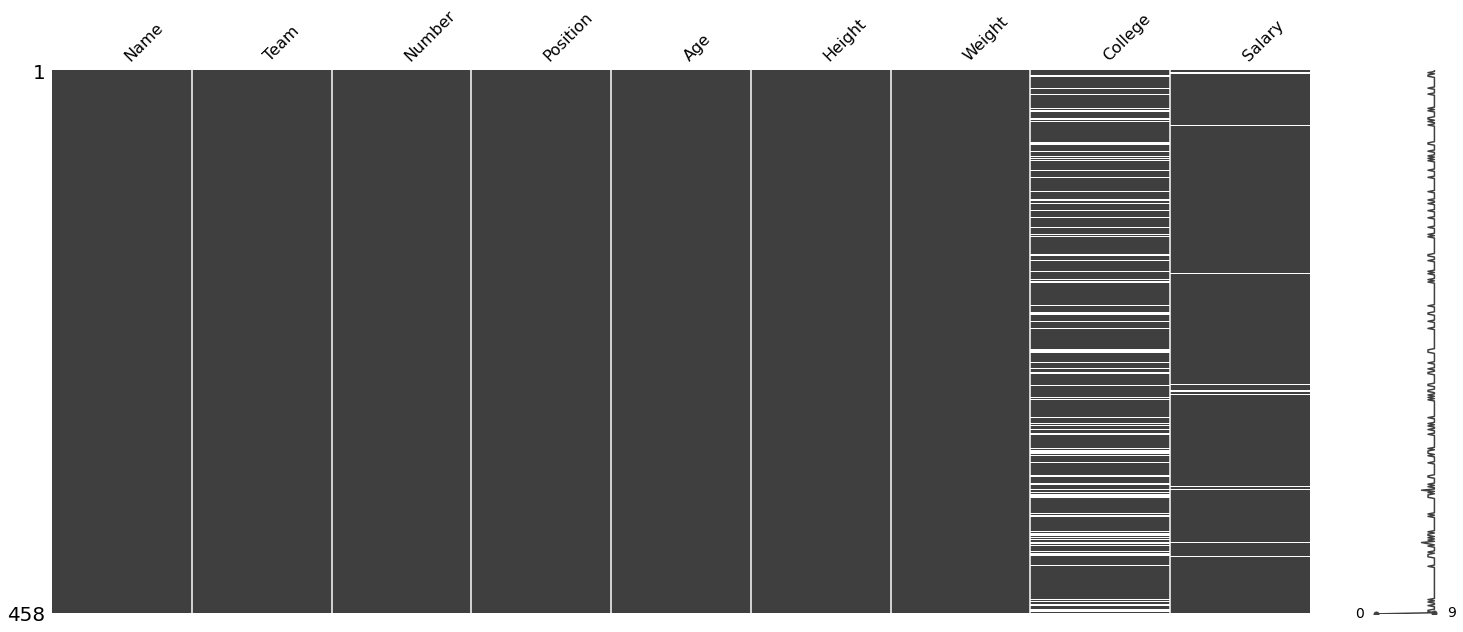

In [18]:
# plotting to see missing information
ms.matrix(df)
plt.show()    # to hide plot axes

In [22]:
# what about looking at missing values in numerical terms?
# checking % of missing records 
missing_pct = df.isnull().mean()

print(missing_pct.sort_values(ascending=False) * 100)

College     18.558952
Salary       2.620087
Name         0.218341
Team         0.218341
Number       0.218341
Position     0.218341
Age          0.218341
Height       0.218341
Weight       0.218341
dtype: float64


GREAT! You have now completed the beginning steps to conduct an `EDA` process to help you better understand the dataset you have on hand. Let's move on to some basic `data manipulation` or `data transformation`. 

***
## **Data manipulation / transformation**
***

Before we begin, let me ask you a simple question! What do you observed about the `Height` column in the dataset? 

> Question: Do you think it is easy to understand, especially using considering `measurements` used in Singapore?

> Ans:

In [32]:
# convert the height to cm so that we can easily understand it 
height_split = df["Height"].str.split("-", expand=True)
feet, inches = height_split[0].astype(float), height_split[1].astype(float)

# height conversation
# 1 ft = 12 inch, 1 inch = 2.54 cm
df["Height_Adjusted"] = (feet * 12 + inches) * 2.54

# removing old `Height` column
df = df.drop(["Height"], axis=1)

# checking first 5 rows to ensure transformation is conducted
df.head()

,Name,Team,Number,Position,Age,Weight,College,Salary,Height_Adjusted
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,Texas,7730337.0,187.96
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,235.0,Marquette,6796117.0,198.12
2,John Holland,Boston Celtics,30.0,SG,27.0,205.0,Boston University,NaN,195.58
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,185.0,Georgia State,1148640.0,195.58
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,231.0,NaN,5000000.0,208.28


In [33]:
# convert jersey no. to categorical (str) as it does not need to be in number 
df["Number"] = df["Number"].astype(str)

# checking the new dtype to ensure that changes was made
print(df.dtypes)

Name                object
Team                object
Number              object
Position            object
Age                float64
Weight             float64
College             object
Salary             float64
Height_Adjusted    float64
dtype: object


***
## **Preparing for data visualization**
***

In [34]:
# lets create a list for categorical and numerical features seperately 
cat_cols = list(df.columns[df.dtypes == 'object'])
num_cols = list(df.columns[df.dtypes != 'object'])

# print some statement to verify the result
print(f"There are categorical cols: {len(cat_cols)} and numerical cols: {len(num_cols)}.")

print(f"\nIndex of categorical columns:")
for i, col in enumerate(cat_cols):   
    print(f"{i}: {col}")

print(f"\nIndex of numerical columns:")
for i, col in enumerate(num_cols):   
    print(f"{i}: {col}")

There are categorical cols: 5 and numerical cols: 4.

Index of categorical columns:
0: Name
1: Team
2: Number
3: Position
4: College

Index of numerical columns:
0: Age
1: Weight
2: Salary
3: Height_Adjusted


***
## **Data visualization**
***

After we had spent some time digging through the dataset and answered a few of the questions on hand, we have now reached the `Exploratory Data Analysis (EDA)` stage, where we are going to utilise various visualisation methods such as `Bar Chart`, `Pie Chart`, `Histograms`, `Scatter Plot` and `Line Plot` to help visualise the data. After all, human are trained to retain [visual information](https://www.shiftelearning.com/blog/bid/350326/studies-confirm-the-power-of-visuals-in-elearning) longer than written (textual) information.


The following serves as a valuable cheatsheet if you are just starting out in Data Science. It provides you with a high level overview in what each visualisation attempts to communicate and the different types available.

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1688884%2Fb4372f0e806b6f75c7b56904b1159a68%2FData%20Visualization%20Cheatsheet.jpg?generation=1592767560257939&alt=media" width="600" height="600" align="center"/>

In [43]:
# let set some pre-plotting configurations

FIGSIZE = (12, 8)

In [87]:
# define some useful functions to reduce the line of code written
def plot_num_cols(x, xlabel, ylabel, title, figsize, package='seaborn'):
    """Generic function to plot histogram. 
    
    Args:
        x ([pd.Series]):
        xlabel ([str]):
        ylabel ([str]):
        title ([str]):
        figsize ([tuple]):
        package ([str]): Between `matplotlib` and `seaborn`. Default to ['seaborn']
    """
    plt.figure(figsize=figsize)
    
    if package == 'seaborn':
        sns.histplot(x)
    else:
        plt.hist(x)
    # defining x-axis
    plt.xlabel(xlabel)
    # defining y-axis
    plt.ylabel(ylabel)
    # defining title
    plt.title(title)
    plt.show()

***
### **`Univariate` EDA**
***

To start off with `data visualization`, let's conduct `univariate EDA`. What exactly is *univariate*? We defined `univariate` as:

> Looking at one variable (data column) at a time. 

This is akin to looking at `Height_Adjusted`, `Weight` independently. We are not interested in understanding the relationship at this stage. 


### **Understanding player's information**

> Question: What is the distribution of the player's height and weight?

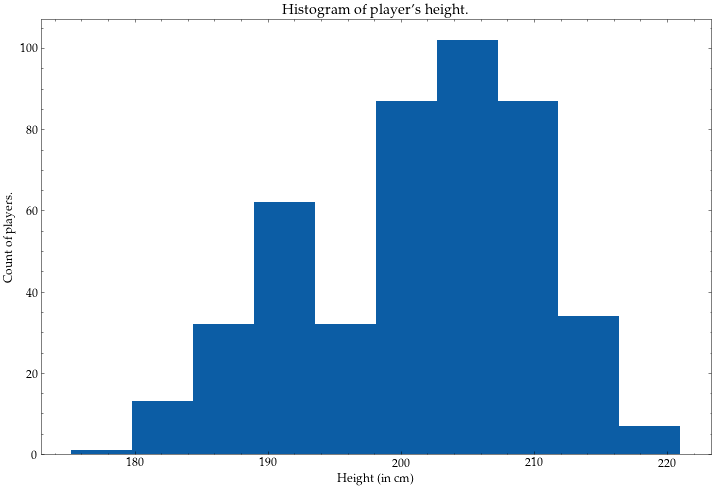

In [47]:
# let look at height first
# let's try plotting via `matplotlib`'s way

# defining 'x'
height = df["Height_Adjusted"]

# defining plot size
plt.figure(figsize=FIG_SIZE)
# plotting the viz
plt.hist(height)
# defining x-axis
plt.xlabel("Height (in cm)")
# defining y-axis
plt.ylabel("Count of players.")
# defining title
plt.title("Histogram of player's height.")
plt.show()

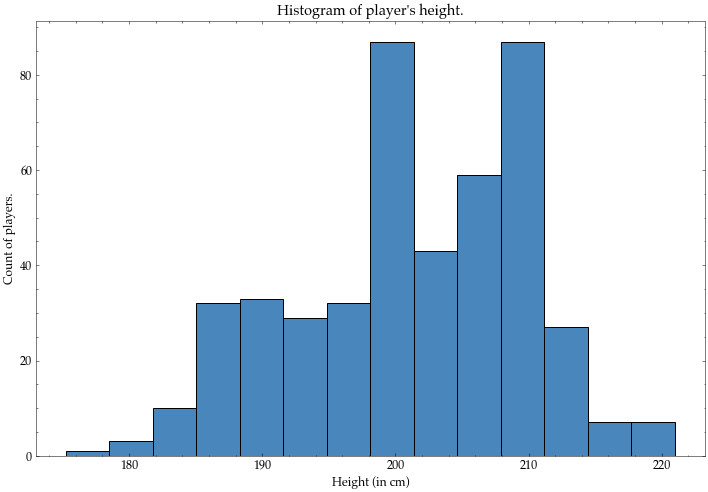

In [55]:
# let's plot via `seaborn`

# defining plot size
plt.figure(figsize=FIG_SIZE)
# plotting the viz
sns.histplot(height)
# defining x-axis
plt.xlabel("Height (in cm)")
# defining y-axis
plt.ylabel("Count of players.")
# defining title
plt.title("Histogram of player's height.")
plt.show()

> Since now you have experience how to plot for `Height_Adjusted`, what about `Weight`?

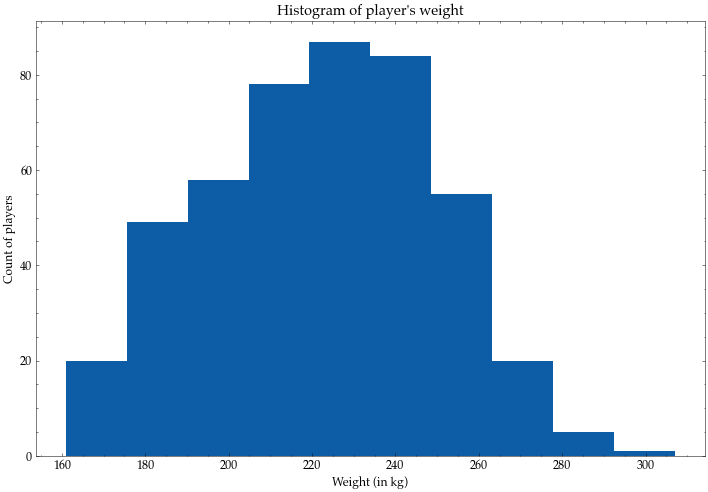

In [90]:
# plot matplotlib for `Weight`

# defining `weight`
weight = df["Weight"]

plot_num_cols(x=weight, 
              xlabel="Weight (in kg)", 
              ylabel="Count of players", 
              title="Histogram of player's weight", 
              figsize=FIGSIZE, 
              package='matplotlib')

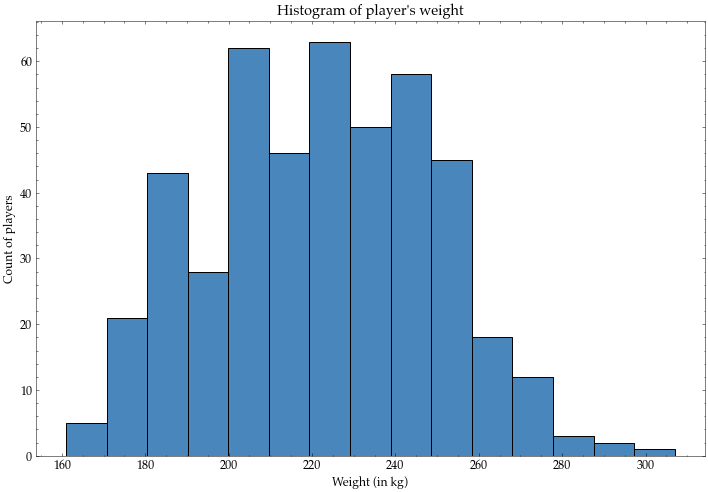

In [91]:
# plot seaborn for `Weight`
plot_num_cols(x=weight, 
              xlabel="Weight (in kg)", 
              ylabel="Count of players", 
              title="Histogram of player's weight", 
              figsize=FIGSIZE, 
              package='seaborn')

### **Understanding player's information on team-level**

We have previously plotted information on `Height_Adjusted` and `Weight` based on a player-level. That means we are looking at the data row by row, record by record. There will be time we might need to `aggregate` the dataset in a certain level before we visualize it.

                        Height_Adjusted
Team                                   
Atlanta Hawks                201.337333
Boston Celtics               198.797333
Brooklyn Nets                199.644000
Charlotte Hornets            200.998667
Chicago Bulls                202.522667
Cleveland Cavaliers          200.998667
Dallas Mavericks             202.692000
Denver Nuggets               200.998667
Detroit Pistons              200.152000
Golden State Warriors        201.845333
Houston Rockets              201.845333
Indiana Pacers               200.152000
Los Angeles Clippers         199.644000
Los Angeles Lakers           202.014667
Memphis Grizzlies            198.966667
Miami Heat                   201.337333
Milwaukee Bucks              201.930000
Minnesota Timberwolves       204.288571
New Orleans Pelicans         200.258947
New York Knicks              202.247500
Oklahoma City Thunder        202.014667
Orlando Magic                200.478571
Philadelphia 76ers           201.506667


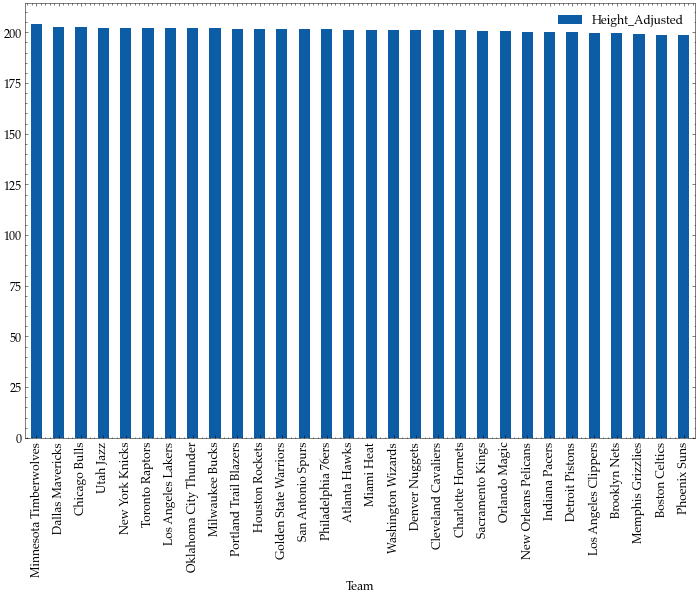

In [83]:
# let's aggregate the height by the team level, we will do mean aggregation
mean_height_team = df.groupby("Team").agg({"Height_Adjusted": 'mean'})

# let's see the result
print(mean_height_team)

# plot team by their aggregated height
# using pandas's plot method
(mean_height_team
 .sort_values(by='Height_Adjusted', ascending=False).
 plot(kind='bar', figsize=FIGSIZE))

plt.show()

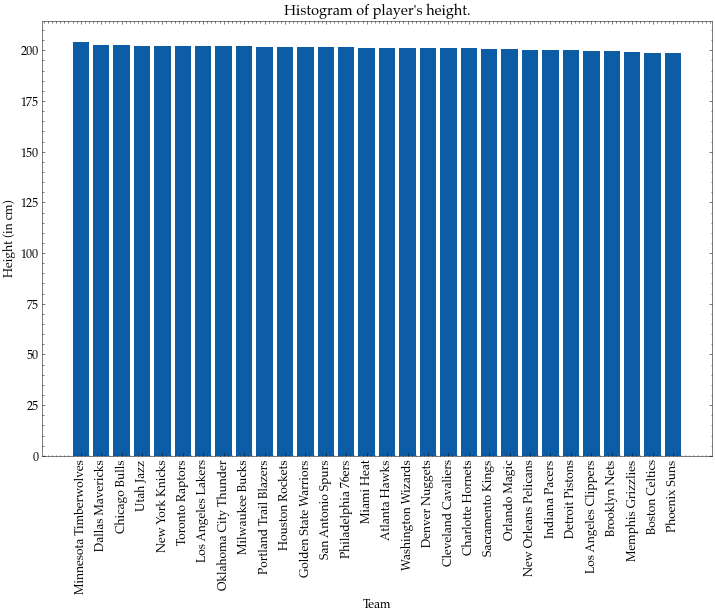

In [101]:
# plotting in matplotlib 

mean_height_team = mean_height_team.sort_values(by='Height_Adjusted', ascending=False)
labels = mean_height_team.index.tolist()
heights = mean_height_team["Height_Adjusted"].values.tolist()

# defining plot size
plt.figure(figsize=FIG_SIZE)
# plotting the viz
plt.bar(labels, heights)
# defining x-axis
plt.xlabel("Team")
# defining y-axis
plt.ylabel("Height (in cm)")
# rotating x-axis 90 degree
plt.xticks(rotation=90)
# defining title
plt.title("Histogram of player's height.")
plt.show()

/Users/jensen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


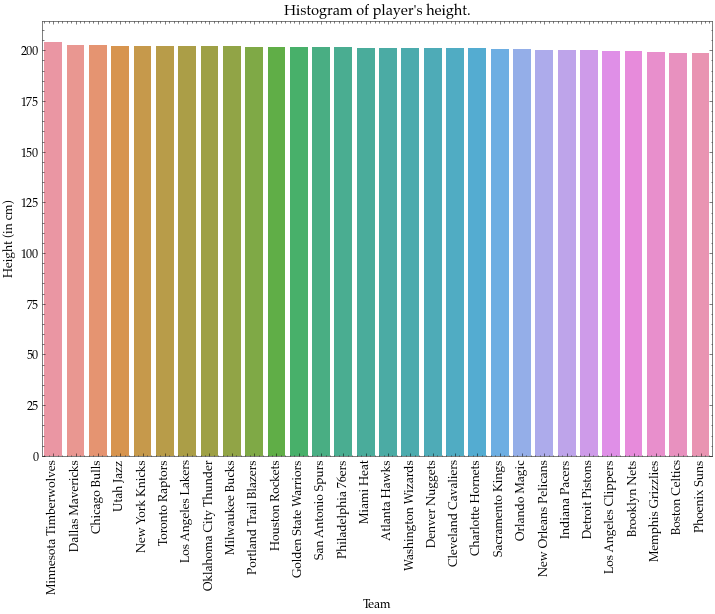

In [105]:
# plotting in seaborn

# defining plot size
plt.figure(figsize=FIG_SIZE)
# plotting the viz
sns.barplot(labels, heights)
# defining x-axis
plt.xlabel("Team")
# defining y-axis
plt.ylabel("Height (in cm)")
# rotating x-axis 90 degree
plt.xticks(rotation=90)
# defining title
plt.title("Histogram of player's height.")
plt.show()

> Since now you have experience how to plot for `Height_Adjusted`, what about `Weight`?

In [ ]:
# pandas's plot

In [ ]:
# matplotlib

In [106]:
# seaborn

***
### **`Bivariate` EDA**
***

So what is `bivariate`?

> Looking at exactly **TWO** variables (data columns) at a time.

We can now start to explore the relationship among the various attributes in the dataset, such as:

* "Are taller players heavier in weight?", 
* "Do players in a particular position get paid more?" or 
* "Which team gives the least salary?".